In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Q1: What's the distribution of total U.S. energy consumption by source?

For this question, we will use the data from the U.S. Energy Information Administration (EIA). The EIA publishes Annual Energy Review, which provides comprehensive data on relevant energy topics for 1949 forward. For this question specifically, we will use the "2022 Primary Energy Consumption by Source" data subset. This data provides the total U.S. energy consumption by source for the years 1949-2022. The raw dataset contains 8208 rows and 6 columns, with each row representing the energy consumption by a particular source for a particular month. There are three big source categories: fossil fuels, nuclear, and renewable energy. The fossil fuels category includes coal, natural gas and petroleum. The renewable energy category includes biomass, geothermal, hydroelectric power, solar and wind energy. The nuclear category includes nuclear power. The data is in quadrillion Btu (British thermal units) and is measured on a monthly basis.

To clean the dataset, we will first filter out the annual data because we are interested in the total energy consumption by source for the entire year. We will do this by separating the year and month from the Date (YYYYMM) column and choosing the rows where the month is equal to 13. Then, we will clean any "N/A" values by replacing them with 0. We will also convert all the values to float. Finally, we will create a pivot table so we have each source as a column and the total energy consumption as the value, with the year as the index.

In [3]:
# Load the EIA dataset
energy_consu = pd.read_csv('Primary energy consumption estimates by source.csv')

# Separate the year and month from the YYYYMM column
energy_consu['Year'] = energy_consu['YYYYMM'].astype(str).str.slice(start=0, stop=4)
energy_consu['Month'] = energy_consu['YYYYMM'].astype(str).str.slice(start=4, stop=6)

# Select only the annual data by choosing the month 13
energy_consu = energy_consu[energy_consu['Month'] == '13']

# Clean N/A values by replacing them with 0
energy_consu['Value'] = energy_consu['Value'].replace("Not Available", 0).astype(float)

# Convert the values to float
energy_consu['Value'] = energy_consu['Value'].astype(float)

# Pivot the table to have the energy sources as columns
energy_consu = energy_consu.pivot(index='Year', columns='Description', values='Value')

# Renaming the columns to remove 'Consumption'
energy_consu.columns = [col.replace(' Consumption', '') for col in energy_consu.columns]

# Reordering columns to put 'Total' columns at the far right
columns = [col for col in energy_consu.columns if not col.startswith('Total')] + \
          [col for col in energy_consu.columns if col.startswith('Total') and col != 'Total Primary Energy'] + \
          ['Total Primary Energy']

# Reassigning the reordered columns to the dataframe
energy_consu = energy_consu[columns]


,Biomass Energy,Coal,Geothermal Energy,Hydroelectric Power,Natural Gas (Excluding Supplemental Gaseous Fuels),Nuclear Electric Power,Petroleum (Excluding Biofuels),Solar Energy,Wind Energy,Total Fossil Fuels,Total Renewable Energy,Total Primary Energy
Year,,,,,,,,,,,,
1949,1.549262,11.980905,0.000000,0.323365,5.145142,0.000000,11.868994,0.000000,0.000000,28.988371,1.872627,30.866419
1950,1.562307,12.347109,0.000000,0.344218,5.968371,0.000000,13.298283,0.000000,0.000000,31.614755,1.906525,33.527374
1951,1.534669,12.552996,0.000000,0.356131,7.048518,0.000000,14.407674,0.000000,0.000000,33.987736,1.890800,35.885997
1952,1.474369,11.306479,0.000000,0.374325,7.549621,0.000000,14.933895,0.000000,0.000000,33.778116,1.848694,35.634550
1953,1.418601,11.372684,0.000000,0.374015,7.906645,0.000000,15.531959,0.000000,0.000000,34.802286,1.792616,36.601753
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,5.104513,13.251532,0.117980,0.998092,31.162834,8.438068,36.891820,0.383634,0.930341,81.280532,7.534561,97.404845
2019,5.056000,11.315595,0.116293,0.982225,32.263692,8.451852,36.866381,0.429747,1.009551,80.424546,7.593816,96.603433
2020,4.545130,9.181109,0.117716,0.973355,31.640017,8.251075,32.331134,0.511315,1.153045,73.139322,7.300560,88.852392


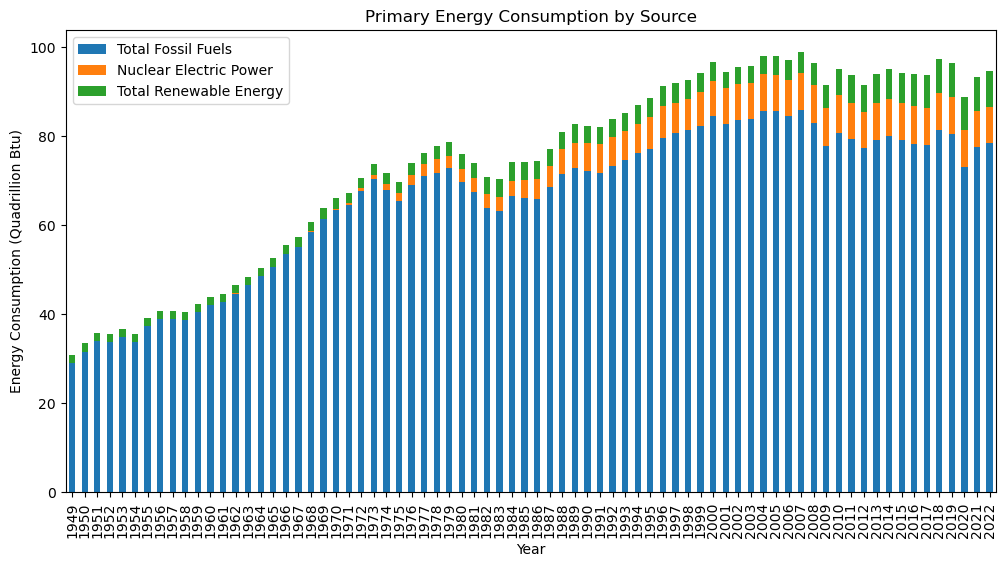

In [5]:
# Stacked bar chart of the primary energy consumption by source
total__columns = ["Total Fossil Fuels", "Nuclear Electric Power", "Total Renewable Energy"]
energy_consu[total__columns].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Primary Energy Consumption by Source')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (Quadrillion Btu)')
plt.show()

This stacked bar chart shows the distribution of total U.S. energy consumption by source for the years 1949-2022. The x-axis represents the years, and the y-axis represents the total energy consumption in quadrillion Btu. Each bar represents the total U.S. energy consumption for a particular year, and is divided into three segments, representing the energy consumption by fossil fuels, nuclear, and renewable energy. As we can see, the total U.S. energy consumption has been rising steadily over the years, with fossil fuels being the dominant source of energy, representing more than 80% of the total energy consumption. Starting around 1970, we can see nuclear and renewable energy sources each gaining a larger share of the total energy consumption over time. And starting around 2008, we start to see a slow decline in the share of fossil fuels, with renewable energy sources gaining a larger share. However, renewable energy still represents a small fraction of the total energy consumption compared to fossil fuels.

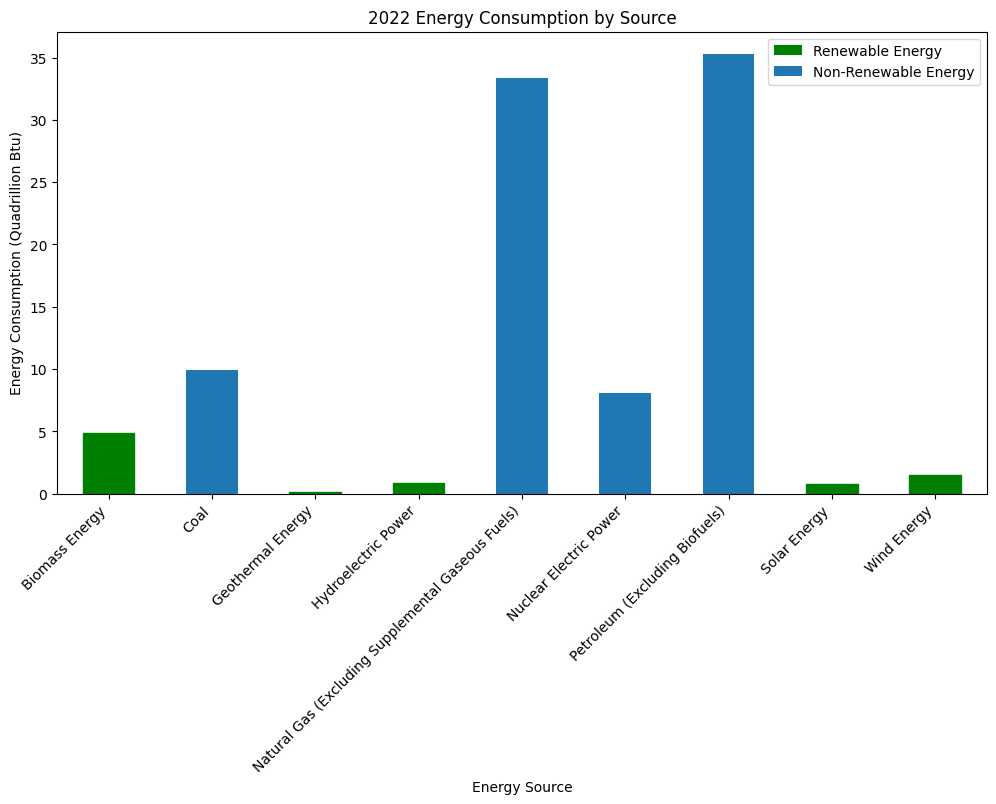

In [70]:
columns = ["Biomass Energy", "Coal", "Geothermal Energy", "Hydroelectric Power",
"Natural Gas (Excluding Supplemental Gaseous Fuels)", "Nuclear Electric Power", 
"Petroleum (Excluding Biofuels)", "Solar Energy", "Wind Energy"]
renewable_energy = ['Biomass Energy', 'Geothermal Energy', 'Hydroelectric Power', 'Solar Energy', 'Wind Energy']

# Bar chart of 2022 energy consumption
ax = energy_consu[columns].loc['2022'].plot(kind='bar', figsize=(12, 6))
plt.title('2022 Energy Consumption by Source')
plt.xlabel('Energy Source')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Energy Consumption (Quadrillion Btu)')

# Set the color of bars inside renewable_energy to green
for i, bar in enumerate(ax.patches):
    if columns[i] in renewable_energy:
        bar.set_color('green')

# Create a legend for renewable energy and non-renewable energy
renewable_patch = plt.bar(0, 0, color='green', label='Renewable Energy')
non_renewable_patch = plt.bar(0, 0, label='Non-Renewable Energy')
plt.legend(handles=[renewable_patch, non_renewable_patch])

plt.show()

This bar chart shows the 2022 annual U.S. energy consumption by source. The x-axis represents the energy sources, and the y-axis represents the total energy consumption in quadrillion Btu. As we can see, fossil fuels are clearly the dominant source of energy. Petroleum, natural gas, and coal are the top three sources of energy consumption, taking up the majority of the total energy consumption. Renewable energy sources represent significantly less energy consumption compared to fossil fuels and nuclear, with biomass being the largest contributor among the renewable energy sources. Other renewable energy sources such as geothermal, hydroelectric power, solar, and wind energy represent a very small fraction of the total energy consumption.